In [6]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
fontsize = 16


sns.set_context("paper", rc={
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize,
    "xtick.labelsize": fontsize,
    'ytick.labelsize': fontsize,
    'grid.linewidth': 1.5,
})
sns.set_style("ticks", {"xtick.major.size": 14, "ytick.major.size": 14})

plt.rc('font', family='Times New Roman', weight='bold', size=fontsize)
# plt.rc('lines', lw=3.5)
plt.rcParams.update(
    {'font.size': fontsize, "axes.grid": True, 'grid.linestyle': '-.'})


path_mac = "."
path_linux = "."
PATH = utils.get_data_path(path_mac=path_mac, path_linux=path_linux)

In [7]:
import numpy as np
all_csvs = list(
    map(lambda x: f'{x.split(".csv")[0]}', glob.glob(f"{PATH}/num_container*.csv")))
strategies = ["Kraken"]
legends = ["Kraken"]
strategy_csvs = {
    strategy: list(filter(lambda x: strategy in x, all_csvs)) for strategy in strategies
}

data = pd.DataFrame()
for strategy, csvs in strategy_csvs.items():
    for csv in csvs:
        df = pd.read_csv(f"{csv}.csv")
        SOL_quantail = csv.split("_")[-1]
        df['SOL_quantail'] = SOL_quantail
        if strategy == 's_Batching':
            df['strategy'] = "FaaSBatch"
        else:
            df['strategy'] = strategy
        data = pd.concat([df, data])


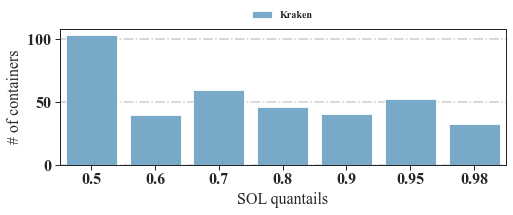

In [8]:
def bar_plot(y, y_label):
    fig, ax1 = plt.subplots(figsize=(8, 2.5))
    sns.barplot(x="SOL_quantail", y=y, hue="strategy", hue_order=legends,
                data=data, palette="Blues", order=sorted(data['SOL_quantail'].unique()))
    data['strategy'].unique()
    sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1),
                    ncol=4, title=None, frameon=False, fontsize=fontsize-6)
    ax1.set_ylabel(y_label)
    ax1.set_xlabel("SOL quantails")
    fig.show()

bar_plot(y="num_containers", y_label="# of containers")